#The infinite "unsqaure" potential
Author: Harjeet Kalsi   
last eddited: 04/03/16

Solving the quantum-mechanical problems. 

This notebook looks at boundary values in sloving differential equations and will first solve for an infinte square potenital well. It will the be possible to extend this to calculate for systems where there is no simple analytical solution. 

The task involves applying knowlegde of boundary value problems to the one-dimentional time-independent Schrodinger equation (TISE): 
$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x)
$$

Over the course of this notebook we will look at different functions of potenital and try to solve for solutions. We will look at, the infinite square well potential, a harmonic potenital within an infinte sqaure well, a finite sqaure well potential and then I will try  my own choice of potenital( a rectangular barrier potential.) 

###Infinite square well potential

Initially going to consider the solutions of the TISE for a particle in a square well of width 2a with infintely high walls. The potential for this situation takes the form: $$ V_x = \begin{cases} 0 & \text{if } -a < x < +a, \\ 
\infty  & \text{if } |x| > a, \end{cases} 
$$

The solutions show that the probability of finding the particle in the region where $$ V(x)= \infty $$ is zero, and thus the wavefunction must be subject to the boundary condition of $$\psi=0$$ at x=a and x=-a


Seperating out the TISE into 2 1st order equations we get: $$
(1)     \frac{d \psi}{dx } = \phi, \\               
(2)     \frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x),
$$                     

The schrodinger equation is a linear equation and is also defined as an eigenvalue equation, therefore only has solutions at particular values of the energy E. 
The approach adopted for this problem therefore will search for intial values of E that will give us the required solutions. 
As the only effect of $$\phi's$$ initial condition is to multipy the wavefunction by a constant, any starting value of E may be chosen. The wavefunction can be normalised once we have found the solution. 

####Finding the ground state energy

First need to import mathematical functions and plotting tools which will be used throughout the notebook:

In [114]:
# importing modules
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


Also need to define some parameters that we will also be using throughout the calculations: 

In [115]:
#defining physical constants 
m= 9.1094*(10**-31)           #electron mass
hbar= 1.0546*(10**-34)           
e= 1.6022*(10**-19)         #electron charge 

#defining other parameters
a= 5.0*(10**-11)              #half width of the potential well 

For the potential we have defined above, the particle will never be outside the well and  V (x) = 0 inside the well. Later in the task other forms of V (x) will be calculated. A function will be written for this V(x) that return a value of
V (x) = 0 for all values of x, the function input1: 

In [116]:
#producing a function for V(x)
def V(x):
    '''Produces a value of V=0 for all values of x inputed'''
    
    if -np.inf<=x<=np.inf:  #for the values where x is between minus infinity         
             V=0.0            #and infinity the potenital will be zero
   
    return V 

The Schrodinger equation was split into 2 frist order equations (1) and (2) as defined above. It is necessary to write functions that calulate the right hand side of these equations: 

In [117]:
#creating a function for the rhs of the equations (1) and (2)
def f(r,x,E):
    ''' Definition of our numerical function
    Inputs:
    r: vector where 1st element represnts psi and the 2nd phi 
    x: value of x at which to evaulate the function
    E: energy value at which the function is evaluated
    Outputs:
    f(psi,phi): returns 2 arrays, one for each rhs of the equation '''
    psi= r[0]  
    phi=r[1]
    f1=phi    # dψ/dt = φ
    f2=((2*m)/(hbar**2))*(V(x)-E)*psi #dφ/dt = 2m/ћ^2[V(x)-E]ψ(x)
    return  np.array([f1,f2], float) #returns the 2 rhs of the equations 


The Runge Kutta function will be used in its fourth-order form, to return an array of the wavefunction values psi(x) : 

First some inital conditions will be defined and an array of xpoints: 

In [118]:
N=1000   #number of Runge-Kutta calculation points 
h=(2*a)/N #step size 
xpoints= np.arange(-a,a,h)
#creates an initial array for r where phi is set to 1 however any value can 
#be chosen 
phi=1   #inital condition 
psi=0

r=np.array([psi,phi],float)



These will be used in the function below so that the loop will run over an array of N x-points starting at
x = -a and fnishing at x = +a, with step size h = 2a/N.

In [119]:
def RungeKutta2d(r,xpoints, E):
    '''Fourth-order Runge Kutta. 
    Inputs: 
    r: vector where 1st component is psi and 2nd is phi
    xpoints: an array of x-values
    Also depends on step h (global variable)
    Outputs: solutions for psi(x) and phi(x)'''
    
    psipoints = [] # a new array for the  results
    phipoints=[]
    
    for x in xpoints:
        psipoints.append(r[0]) 
        phipoints.append(r[1])
        k1 = h*f(r,x,E)     
        k2 = h*f(r+0.5*k1, x+0.5*h, E)
        k3 = h*f(r+0.5*k2, x+0.5*h, E)
        k4 = h*f(r+k3, x+h,E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    # these next two lines calculate for the point at x = xend!
    psipoints.append(r[0]) 
    phipoints.append(r[1])
    return np.array([psipoints, phipoints]) # convert output to numpy array with 2 rows and N columns

A code cell will be set up to iiterate using the secant method until a value of E is found that gives the required psi(x)=0 at x=a. To do this 2 inital guesses for the energy are made. A tolerance variable is also set up, so that the calculation will stop once the best estimate of the root position changes by less than this amount: 

In [120]:
E1=20*e    #inital guesses 
E2=45*e
tolerance = e/1000 
err=1  # initialise the error variable

#solving for the guesses
psi1= RungeKutta2d(r,xpoints, E1)[0,N] # only interested in the final value calculated by the function
psi2= RungeKutta2d(r,xpoints, E2)[0,N]

#using the secant method to converge on the right answer
#Iterate the secant method:
while err > tolerance: 
    E3 = E2 - psi2*(E2-E1)/(psi2-psi1)
    print "current best guess of root", E3 , "J"
    err = abs(E2-E1) 
    E1 = E2 # reset x1 and x2
    E2 = E3 # for the next iteration
    #and recalculate the solutions 
    psi1= RungeKutta2d(r,xpoints, E1)[0,N]
    psi2= RungeKutta2d(r,xpoints, E2)[0,N]   
print "Which is", E3/e, "eV"

current best guess of root 6.38856551851e-18 J
current best guess of root 5.96410224534e-18 J
current best guess of root 6.02779922733e-18 J
current best guess of root 6.02499991186e-18 J
current best guess of root 6.02497862535e-18 J
current best guess of root 6.02497863282e-18 J
Which is 37.6044103908 eV


As you can see from the outputs the series converges and the best guess of the root is found at 6.02497863282e-18 J. 

The code written above converges on the ground sate reasonable quickly. To check this result it can be compared with the known ground energy state where the eigenvalues of the system are given by: $$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2}
$$

In [121]:
#using formula when n=1 (ground state)
Ecal=((np.pi**2)*(hbar**2))/ (2*m*((2*a)**2))
print "The known ground state engery for this system is", Ecal, "J"
print "This is equvalent to", (Ecal/e) , "eV" 

The known ground state engery for this system is 6.02497863281e-18 J
This is equvalent to 37.6044103908 eV


Comparing this known value with the best guess of the root, it is seen how similar they are; only differing by the value of their last decimal place. Therefore this shows the sucess of using the Runge Kutta function and the Secant method for boundary value problems. 

####Finding the ground state wavefunction 

In this section the ground state wavefunction will be calculated and plotted. 

The wavefunction from the previous section is not normalised, a normalised wavefunction satisfies the following condition: $$
\int | \psi(x) |^2 {\rm d} x = 1
$$

To find the intergral of the RHS of the equation above, the trapezoidal rule can be used, where an intergral with limits a and b can be evaluated as: $$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + kh) \right]
$$
In this case the integral limits are at the walls of the well therefore at -a and a. To normalise the wavefunction therefore, is to times it by : 


$$ \frac{1}{\sqrt{I(a,b)}} $$  
which we will call the normalisation constant. 

In [122]:
#The un-normalised wavefunction 
psiground= RungeKutta2d(r,xpoints,E3)[0]#these are the values for the calcualted wavefunction, the RugneKutta2d function
                                       #returns 2 arrays, with the 1st representing the psiground array therefore we select
                                       #the first array [0]


#calculating the intregal which can be used to find the normalisation constant for the wavefunction 
#going to create a function that returns the normalisation constant
def Normcon(psi):
    '''Calculates intregal of wavefunction using the trapezium rule, then uses the value to 
    calculate the normalisation constant
    Inputs:
    psi: desired wavefunction  
    Outputs:
    Norm(psi): normalisation constant '''
    I=h*((0.5* (psi[0]**2) )+(0.5*(psi[N]**2))+(np.sum(psi[1:N-1]**2))) #finds the intregal using the trapezium formula 
    Normcon=1/np.sqrt(np.abs(I)) #normalisation constant is found by 1/sqaureroot(intregal)
    return Normcon 

#normalising the wavefunction 
print Normcon(psiground)  #normalisation constant calculated using the funciton 
#print I  #also can print the intregal 
psinorm=Normcon(psiground)*psiground    #normalised wavefunction= normalisation constant*the wavefunction 
print psinorm 

4.44288298201e+15
[  0.00000000e+00   4.44287567e+02   8.88570750e+02 ...,   8.88570750e+02
   4.44287567e+02  -6.56774609e-10]


We are now going to plot the normalised wavefunction: 

In [10]:
#the length of the arrays is frist checked 
print len(psinorm)
print len(xpoints)   

1001
1000


As can be seen the psinorm wavefunction has N+1 values and there are only N xpoints, therefore we'll slice the psinorm array to give N values instead:

In [11]:
print len(psinorm[1:])

1000


Before plotting this normalised wavefunction it is possible to calculate the ground state wavefunciton from the known equations: 
$$ \psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd}
    $$
    $$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even}.
$$
We'll create a function to implement these eqautions:

In [12]:
def PSIn(x,n):
    ''' Inputs: 
    x: particle position 
    n: desired energy state 
    Output: the analytical solution for psi'''
    p=(n*np.pi)/(2*a)
    return (1/np.sqrt(a))*np.sin(p*x) if n% 2 == 0 else (1/np.sqrt(a))*np.cos(p*x) #This returns the top eqaution is n is odd 
                                                                                   #and the bottom equation is n is even

We can now then plot the numerical solution of the normalised wavefunction and the wavefunction given by the known equation and compare the two: 

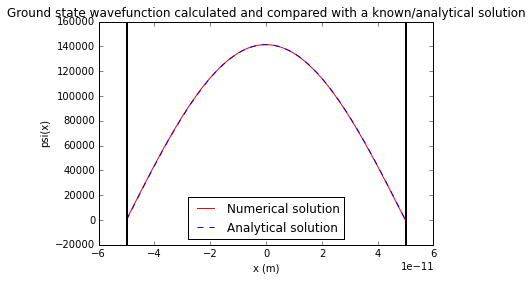

In [124]:
#plotting the numerical solution of the wavefunciton
plt.plot(xpoints,psinorm[1:],'r-', label='Numerical solution ')

#plotting the wavefunction from the known equations, using the PSIn() function 
plt.plot(xpoints, PSIn(xpoints,1),'b--',label='Analytical solution')

# constructing the boundary at -a and a 
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.legend(loc='lower center')

#labelling of axis and plot tittle 
plt.title("Ground state wavefunction calculated and compared with a known/analytical solution ")
plt.xlabel("x (m)")
plt.ylabel("psi(x)")


As can be seen in the graph above there seems to be a perfect match between the numerical results and the analytical solutions. Both of the wavefunctions show a sinusoidal waveform and there is no wavefunction present outside the well, indicating there is no probabilty of finding the particle in that region. 

####Finding the higher engery states

The next part of the notebook will look at the fist few excited energy states where n=2,3 and 4

To do this, for convience,  a function will be written to implement the Secant method which gives us the best estimate of E value corresponding to inital Eguesses for each n. 


In [14]:
def Sec(Ea,Eb):
    '''Calculates the value of E that gives us the required solution. 
    Inputs:
    Ea: 1st initial guess engery 
    Eb: 2nd initial guess engery 
    Outputs: 
    Ec/e: The best guess of the root, the energy in eV '''
    tolerance = e/1000 
    err=1  # initialise the error variable
    #solving for the guesses
    psia= RungeKutta2d(r,xpoints, Ea)[0,N] # only interested in the final value calculated by the function
    psib= RungeKutta2d(r,xpoints, Eb)[0,N]
    #using the secant method to converge on the right answer
    #Iterate the secant method:
    while err > tolerance: 
        Ec = Eb - psib*(Eb-Ea)/(psib-psia)
        
        err = abs(Eb-Ea) 
        Ea = Eb # reset x1 and x2
        Eb = Ec # for the next iteration
        #and recalculate the solutions 
        psia= RungeKutta2d(r,xpoints, Ea)[0,N]
        psib= RungeKutta2d(r,xpoints, Eb)[0,N]                    
    return Ec

We can now use this function to find the best guesses of E for different values of n:

In [15]:
#using the function to calculate the different values of the energy 
En1=Sec(20*e,45*e)
En2=Sec(125*e,160*e)
En3=Sec(320*e,350*e)
En4=Sec(580*e,610*e)

print "The best guess of the energy is", En1/e, "eV  For when n=1"
print "The best guess of the energy is", En2/e, "eV  For when n=2"
print "The best guess of the energy is", En3/e, "eV  For when n=3"
print "The best guess of the energy is", En4/e, "eV  For when n=4"


The best guess of the energy is 37.6044103908 eV  For when n=1
The best guess of the energy is 150.417641567 eV  For when n=2
The best guess of the energy is 338.439693562 eV  For when n=3
The best guess of the energy is 601.670566502 eV  For when n=4


The initial guesses made for these energies were made using a rough prediction. As already found the energy when n=1 was equal to 37.6eV, and the known formula containes multiplying by nsquared. Therefore for n=2 the energy would be aprroximately 4 times the energy when n=1, and for when n=3 it would be 9 times the energy when n=1 ect. Using this knowlegde the initial guesses were made either side of the rough estimate and not too far away. 


Now going to find the corresponding wave functions (using the RungeKutta function)for the energy values found and normalise them: 

In [16]:
#the wavefunctions are found using the RungeKutta2d
Psi2=RungeKutta2d(r,xpoints,En2)[0]  #the wavefunction found numerically for when n=2
Psi3=RungeKutta2d(r,xpoints,En3)[0]
Psi4=RungeKutta2d(r,xpoints,En4)[0]

#normalising these wavefunctions using the normalsation constant function 
Psi2N=Normcon(Psi2)*Psi2  #normalised wavefunction= normalisation constant*the wavefunction 
Psi3N=Normcon(Psi3)*Psi3    
Psi4N=Normcon(Psi4)*Psi4


We can again plot these:

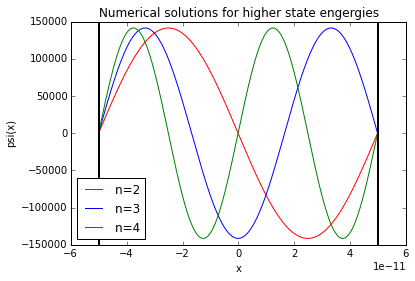

In [17]:
#plotting the normalised wavefunctions for different energy states
plt.plot(xpoints,Psi2N[1:],'r-', label='n=2 ')
plt.plot(xpoints,Psi3N[1:],'b-', label='n=3 ')
plt.plot(xpoints,Psi4N[1:],'g-', label='n=4 ')

# construct the boundary
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axvline(x=-a,c='k',ls='-',lw=2)

#labelling the plot 
plt.legend(loc='lower left')
plt.title("Numerical solutions for higher state engergies ")
plt.xlabel("x")
plt.ylabel("psi(x)")


Physics behind this potential: 
The wavefunctions above are the solutions to the TISE when the potenital is that decribed by an infinite sqaure well. For a particle found inside the well, a free particle wavefunction is found, however since the probability of finding the particle outside the well is zero, the wavefunction goes to zero at the walls. For a free particle, where there is no potenital energy, all the energy is kinetic, giving us these sinusoidial wavefunctions.  The wavefunctions can be used to find the probability of finding the particle at the postition via the Born rule. As the n value increases, the wavelength becomes shorter, reprenting the higher energy the state posseses. 

Can again compare with the wavefunctions produced by the analytic solution, using the "PSIn(x,n)" function prdoduced earlier:

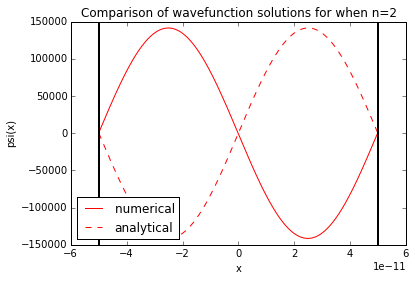

In [127]:
#plotting the the numercial solution for n=2
plt.plot(xpoints,Psi2N[1:],'r-', label='numerical ')

#plotting the analytical solution for n=2 
plt.plot(xpoints, PSIn(xpoints,2),'r--',label='analytical')

#construct the boundary
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.legend(loc='lower left')
plt.title("Comparison of wavefunction solutions for when n=2 ")
plt.xlabel("x")
plt.ylabel("psi(x)")


As you can see in the plot above the analytical solution is a mirror image along the x-axis compared to the numerical solution for which I am unsure why this result is produced. 

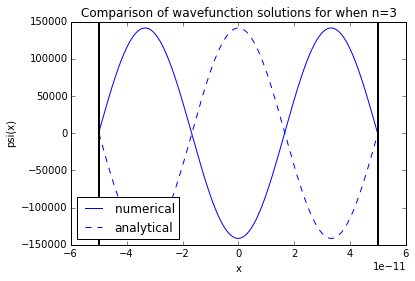

In [128]:
#plotting the analytical solution with the numercial for n=3
plt.plot(xpoints,Psi3N[1:],'b-', label='numerical ')

#plotting the analytical solution for n=3
plt.plot(xpoints, PSIn(xpoints,3),'b--',label='analytical')

#construct the boundary
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.legend(loc='lower left')
plt.title("Comparison of wavefunction solutions for when n=3 ")
plt.xlabel("x")
plt.ylabel("psi(x)")


Again a mirror image is produced along the x=0 line, between the 2 solutions.

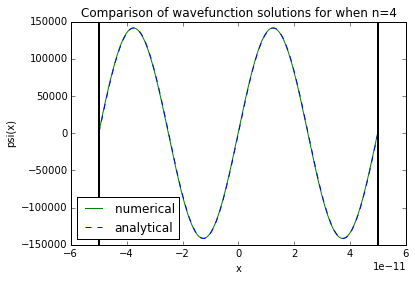

In [129]:
#plotting the analytical solution with the numercial for n=4
plt.plot(xpoints,Psi4N[1:],'g-', label='numerical ')

#plotting the analytical solution for n=4 
plt.plot(xpoints, PSIn(xpoints,4),'b--',label='analytical')

#construct the boundary
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.legend(loc='lower left')
plt.title("Comparison of wavefunction solutions for when n=4 ")
plt.xlabel("x")
plt.ylabel("psi(x)")


Here there is a perfect match of the numerical and analytical solutions. 

We are now going to see if the method still works to find eigenstates for large values of n, to test this we will try when n=20: 

To 1st find the numerical solution again have to make 2 inital guesses, in the case where n=20 the energy is roughly= (37.6 times 400)ev = 15040eV. Therefore our 2 inital guesses chosen should be close to this and either side of the value. 

In [130]:
#finding the best guess of the energy
En20=Sec(14980*e,15095*e)
print "The best guess of the energy is", En20/e, "eV  For when n=20"

The best guess of the energy is 15041.768058 eV  For when n=20


This value seems to be about right. Next finding the wavefunction from this using our RungeKutta function and trying to normalise the wavefunction: 

In [131]:
#the wavefunctions are found using the RungeKutta2d
Psi20=RungeKutta2d(r,xpoints,En20)[0]  #the wavefunction found numerically for when n=20

#normalising these wavefunctions using the normalsation constant function 
Psi20N=Normcon(Psi20)*Psi20  #normalised wavefunction= normalisation constant*the wavefunction 

Again plotting the numerical solution along with the analytical solution:

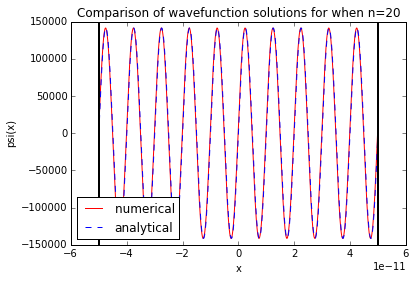

In [23]:
#plotting the the numercial solution for n=20
plt.plot(xpoints,Psi20N[1:],'r-', label='numerical ')

#plotting the analytical solution for n=20 
plt.plot(xpoints, PSIn(xpoints,20),'b--',label='analytical')

#construct the boundary
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axvline(x=-a,c='k',ls='-',lw=2)
plt.legend(loc='lower left')
plt.title("Comparison of wavefunction solutions for when n=20 ")
plt.xlabel("x")
plt.ylabel("psi(x)")


Again there seems to be a perfect match between the numerical results and the analytical solutions. Therefore we can deduce that the numerical method implemented also works to find eigenstates for large values of n, where it is in aggrement with the corresponding analytical solution.

###The infinite sqaure well 

At the moment we have a code that works well to solve for the eigenstates of the infinte sqaure well. The code calculates answers that we already knew from a realtively simple analytical solution. Through adaptaion of this code however it will be possible to calculate for systems that aren't easily solvable analytically. The results in this case will be compared with systems that we have already met. 

The infinite square walls of the potenial well will be kept, guaranteeing again that the particle cannot be found in the v(x)= infinity region; the boundary conditions are the same as the original problem. 

For this new problem however, the base of the potential well will be changed so that it is no longer sqaure. 

####Harmonic potential 

Going to start with embedded potentials with familiar forms, where we'll  be able to explore
the similarities and differences from the analytical solutions. 

We are going to implement this simply by changing the form of the potential
defined in the Python function earlier. The potenial we will 1st look at is the Harmonic potential, defined by the eqaution: $$
V(x) = V_0 \frac{x^2}{a^2}
$$

We will try to calculate the lowest 3 eigenstates and plot the wavefuncitons associated with them. 

In [24]:
#producting a function for our new V(x)
def V1(x):
    '''Produces a potenial equal to the harmonic potential for when x is inside the well 
    x: the x points inside the well
    Outputs: 
    V1(x) : The harmonic potential given by the equation above'''
    V0=800*e
    return V0*(x**2)/(a**2)

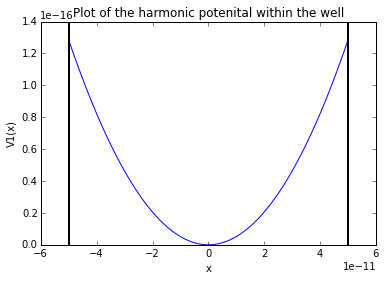

In [25]:
#plotting this new harmonic potential 
plt.plot(xpoints,V1(xpoints))
plt.xlabel("x")
plt.ylabel("V1(x)")
plt.title("Plot of the harmonic potenital within the well")
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axvline(x=-a,c='k',ls='-',lw=2)

The plot shows the harmonic potenital embedded in the infinite well. The particle is still confined within the infinite walls. Setting V0= 800e is a good starting point, as it gives a fairly deep harmonic potential. 

We now need to create a new function for the differential eqautions using the new potential defined: 

In [132]:
#creating a function for the rhs of the equations (1) and (2)
def fh(r,x,E):
    ''' Definition of our numerical function
    Inputs:
    r: vector where 1st element represnts psi and the 2nd phi 
    x: value of x at which to evaulate the function
    E: energy value at which the function is evaluated
    Outputs:
    f(psi,phi): returns 2 arrays, one for each rhs of the equation '''
    psi= r[0]  
    phi=r[1]
    f1=phi    # dψ/dt = φ
    f2=((2*m)/(hbar**2))*(V1(x)-E)*psi #dφ/dt = 2m/ћ^2[V(x)-E]ψ(x)
    return  np.array([f1,f2], float) #returns the 2 rhs of the equations 

Again we need to adapt the RungeKutta2d used before that implements our new fh function with the new harmonic potenital: 

In [133]:
def RungeKutta2dhp(r,xpoints, E):
    '''Fourth-order Runge Kutta rewritten for two simultaneous equations
    Inputs: 
    r: vector where 1st component is psi and 2nd is phi
    xpoints: an array of x-values
    Also depends on step h (global variable)
    Outputs: solutions for psi(x) and phi(x)'''
    
    psipoints = [] # a new array for the  results
    phipoints=[]
    
    for x in xpoints:
        psipoints.append(r[0]) 
        phipoints.append(r[1])
        k1 = h*fh(r,x,E)     
        k2 = h*fh(r+0.5*k1, x+0.5*h, E)
        k3 = h*fh(r+0.5*k2, x+0.5*h, E)
        k4 = h*fh(r+k3, x+h,E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    # these next two lines calculate for the point at x = xend!
    psipoints.append(r[0]) 
    phipoints.append(r[1])
    return np.array([psipoints, phipoints]) # convert output to numpy array with 2 rows and N columns

Now we will also need to adapt our function that implements the Secant method, by renaming it and using the new RungeKutta2dhp:

In [134]:
def Sec1(Ea,Eb):
    '''Calculates the value of E that gives us the required solution. 
    Inputs:
    Ea: 1st initial guess engery 
    Eb: 2nd initial guess engery 
    Outputs: 
    Ec/e: The best guess of the root, the energy in eV '''
    tolerance = e/1000 
    err=1  # initialise the error variable
    #solving for the guesses
    psia= RungeKutta2dhp(r,xpoints, Ea)[0,N] # only interested in the final value calculated by the function
    psib= RungeKutta2dhp(r,xpoints, Eb)[0,N]
    #using the secant method to converge on the right answer
    #Iterate the secant method:
    while err > tolerance: 
        Ec = Eb - psib*(Eb-Ea)/(psib-psia)
        
        err = abs(Eb-Ea) 
        Ea = Eb # reset x1 and x2
        Eb = Ec # for the next iteration
        #and recalculate the solutions 
        psia= RungeKutta2dhp(r,xpoints, Ea)[0,N]
        psib= RungeKutta2dhp(r,xpoints, Eb)[0,N]                    
    return Ec

Can now use this to find the best guess of our energies, we will try to find the roots for when n=1,2 and 3:

In [135]:
#using the function to calculate the different values of the energy 
Enhp1=Sec1(100*e,150*e)  #initial guesses for the energy when n=1 when there is a harmonic potential
Enhp2=Sec1(200*e,350*e)
Enhp3=Sec1(400*e,600*e)


print "The best guess of the energy is", Enhp1/e, "eV  For when n=1"
print "The best guess of the energy is", Enhp2/e, "eV  For when n=2"
print "The best guess of the energy is", Enhp3/e, "eV  For when n=3"



The best guess of the energy is 110.859610622 eV  For when n=1
The best guess of the energy is 336.610856785 eV  For when n=2
The best guess of the energy is 580.477674494 eV  For when n=3


For the inital guesses as I was unsure of the solution, the initial guesses used for Enhp1 were those before of 20*e, and 45*e using those the solution was 110.859610622 eV, therefore i changed my inital guesses to 100*e and 150*e (as seen above). This gave me an indication of the initial guesses I should use for the n=2 and n=3 engery states. 

We can now find the corresponding wavefunctions for the best guess engergies and normalise them: 

In [139]:
#the wavefunctions are found using the RungeKutta2dhp
Psihp1=RungeKutta2dhp(r,xpoints,Enhp1)[0]  #the wavefunction found numerically for when n=1
Psihp2=RungeKutta2dhp(r,xpoints,Enhp2)[0]
Psihp3=RungeKutta2dhp(r,xpoints,Enhp3)[0]

#normalising these wavefunctions using the normalsation constant function 
Psihp1N=Normcon(Psihp1)*Psihp1  #normalised wavefunction= normalisation constant*the wavefunction 
Psihp2N=Normcon(Psihp2)*Psihp2    
Psihp3N=Normcon(Psihp3)*Psihp3


Again we can plot these solutions: 

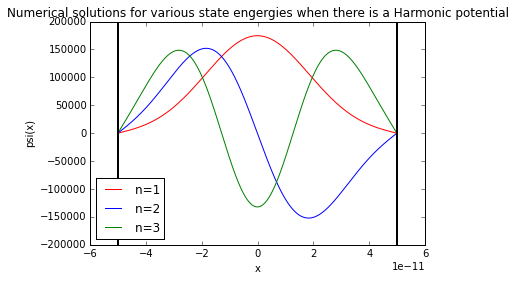

In [140]:
#plotting the normalised wavefunctions for different energy states
plt.plot(xpoints,Psihp1N[1:],'r-', label='n=1 ')
plt.plot(xpoints,Psihp2N[1:],'b-', label='n=2 ')
plt.plot(xpoints,Psihp3N[1:],'g-', label='n=3 ')

# construct the boundary
plt.axvline(x=a,c='k',ls='-',lw=2)
plt.axvline(x=-a,c='k',ls='-',lw=2)

#labelling the plot 
plt.legend(loc='lower left')
plt.title("Numerical solutions for various state engergies when there is a Harmonic potential")
plt.xlabel("x")
plt.ylabel("psi(x)")


When comparing these numerical solutions found with analytic solutions/other solutions it can be seen they are in agreement. Comparing with the solutions found on: http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hosc5.html. The solutions are in agreement. Again with some of the wavefunctions being reflections of the analytical solutions. 

The physics behind this potenital: 
As the value of n increases the wavelength becomes shorter inside the well therefore this coressponds (via the de Broglie relationship) they may be seen to have a higher momentum and therefore energy. From the wavefunctions above, if we think about the sqaure of the wavefunctions, (giving us the probabily density), for this 'quantum oscilllator' the most probable value of position (for the lower states) is dfifferent from a claasical harmonic osiclltor, where it woould normally spend the most time near the end of motion. AS the quantum number increases (e.g for the n=3 solution plotted) wavfunction/probabily distribution becomes more like that of the classical oscialltor. This represents the correspondence principe; tendency to approach the classical behavoir for high quantum numbers. Again energy is quantised and there are both even and odd solutions. 

###Finite square well 

Now going to try and find solutions for the finite square well where the potential takes the form:  $$
V_x = \begin{cases} 0 & \text{if } -a/2 < x < +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases} 
$$

Again we need to define a new function for this potential: 

In [141]:
def V2(x):
    ''' Produces a value of V=0 x values inside the well and V=V0 for x values outside the well'''
    if abs(x) < (a/2):
        V2=0
    else: 
        V2=800*e   #again setting the value of V0 to 800*e as a rough estimate as it worked well for the 
                   #the last time 
    return V2 

Lets again plot this potential: 

In [142]:
#first we need to create an array of the potential values that correspond with our xpoints
V2points = [] # initialise empty output array
for x in xpoints:
    V2points.append(V2(x)) #using the function defined for f(x) to produce f(x) values for given x values 

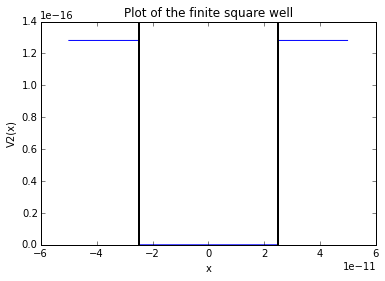

In [143]:
#plotting this new finite square potential 
plt.plot(xpoints,V2points)
plt.xlabel("x")
plt.ylabel("V2(x)")
plt.title("Plot of the finite square well")
plt.axvline(x=a/2,c='k',ls='-',lw=2)
plt.axvline(x=-a/2,c='k',ls='-',lw=2)

Need to also adapt the function that impletments the differential equations using the knew potenial for the finite well. 

In [144]:
#creating a function for the rhs of the equations (1) and (2)
def ffp(r,x,E):   #where fp stands for finite potential 
    ''' Definition of our numerical function
    Inputs:
    r: vector where 1st element represnts psi and the 2nd phi 
    x: value of x at which to evaulate the function
    E: energy value at which the function is evaluated
    Outputs:
    f(psi,phi): returns 2 arrays, one for each rhs of the equation '''
    psi= r[0]  
    phi=r[1]
    f1=phi    # dψ/dt = φ
    f2=((2*m)/(hbar**2))*(V2(x)-E)*psi #dφ/dt = 2m/ћ^2[V(x)-E]ψ(x)
    return  np.array([f1,f2], float) #returns the 2 rhs of the equations 

Adapting the RungeKutta2d potential by changing to the ffp function : 

In [145]:
def RungeKutta2dfp(r,xpoints, E):
    '''Fourth-order Runge Kutta rewritten for two simultaneous equations
    Inputs: 
    r: vector where 1st component is psi and 2nd is phi
    xpoints: an array of x-values
    Also depends on step h (global variable)
    Outputs: solutions for psi(x) and phi(x)'''
    
    psipoints = [] # a new array for the  results
    phipoints=[]
    
    for x in xpoints:
        psipoints.append(r[0]) 
        phipoints.append(r[1])
        k1 = h*ffp(r,x,E)     
        k2 = h*ffp(r+0.5*k1, x+0.5*h, E)
        k3 = h*ffp(r+0.5*k2, x+0.5*h, E)
        k4 = h*ffp(r+k3, x+h,E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    # these next two lines calculate for the point at x = xend!
    psipoints.append(r[0]) 
    phipoints.append(r[1])
    return np.array([psipoints, phipoints]) # convert output to numpy array with 2 rows and N columns

Adapting the secant method function by changing the new RungeKutta2dfp function : 

In [146]:
def Sec2(Ea,Eb):
    '''Calculates the value of E that gives us the required solution. 
    Inputs:
    Ea: 1st initial guess engery 
    Eb: 2nd initial guess engery 
    Outputs: 
    Ec/e: The best guess of the root, the energy in eV '''
    tolerance = e/1000 
    err=1  # initialise the error variable
    #solving for the guesses
    psia= RungeKutta2dfp(r,xpoints, Ea)[0,N] # only interested in the final value calculated by the function
    psib= RungeKutta2dfp(r,xpoints, Eb)[0,N]
    #using the secant method to converge on the right answer
    #Iterate the secant method:
    while err > tolerance: 
        Ec = Eb - psib*(Eb-Ea)/(psib-psia)
        
        err = abs(Eb-Ea) 
        Ea = Eb # reset x1 and x2
        Eb = Ec # for the next iteration
        #and recalculate the solutions 
        psia= RungeKutta2dfp(r,xpoints, Ea)[0,N]
        psib= RungeKutta2dfp(r,xpoints, Eb)[0,N]                    
    return Ec

Can now use this adapted functions to find the best guess of our energies, again for when n=1,2 and 3:

In [147]:
#using the function to calculate the different values of the energy 
Enfp1=Sec2(80*e,150*e)  #initial guesses for the energy when n=1 when there is a harmonic potential
Enfp2=Sec2(200*e,370*e)
Enfp3=Sec2(400*e,600*e)


print "The best guess of the energy is", Enfp1/e, "eV  For when n=1"
print "The best guess of the energy is", Enfp2/e, "eV  For when n=2"
print "The best guess of the energy is", Enfp3/e, "eV  For when n=3"


The best guess of the energy is 91.6579981061 eV  For when n=1
The best guess of the energy is 355.83842782 eV  For when n=2
The best guess of the energy is 1387.29178198 eV  For when n=3


For the inital guesses as I was again unsure of the solutions, the initial guesses used for Enfp1 were those before of 20*e, and 45*e using those the solution was 91.6579981061 eV , therefore i changed my inital guesses to 80*e and 150*e (as seen above). This gave me an indication of the initial guesses I should use for the n=2 and n=3 engery states. As you can see above my guess for the energy when n=3 was not very acurate, but still found a root at 1387.29178198 eV. 

Can use these best guess of the energy to calculate the new wavefunctions and normalise them, again by adapting my previous code : 

In [148]:
#the wavefunctions are found using the RungeKutta2dhp
Psifp1=RungeKutta2dfp(r,xpoints,Enfp1)[0]  #the wavefunction found numerically for when n=1
Psifp2=RungeKutta2dfp(r,xpoints,Enfp2)[0]
Psifp3=RungeKutta2dfp(r,xpoints,Enfp3)[0]

#normalising these wavefunctions using the normalsation constant function 
Psifp1N=Normcon(Psifp1)*Psifp1  #normalised wavefunction= normalisation constant*the wavefunction 
Psifp2N=Normcon(Psifp2)*Psifp2    
Psifp3N=Normcon(Psifp3)*Psifp3


Plotting these wavefuncitons: 

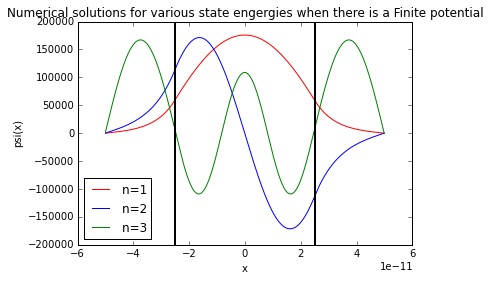

In [149]:
#plotting the normalised wavefunctions for different energy states
plt.plot(xpoints,Psifp1N[1:],'r-', label='n=1 ')
plt.plot(xpoints,Psifp2N[1:],'b-', label='n=2 ')
plt.plot(xpoints,Psifp3N[1:],'g-', label='n=3 ')

# construct the boundary
plt.axvline(x=a/2,c='k',ls='-',lw=2)
plt.axvline(x=-a/2,c='k',ls='-',lw=2)

#labelling the plot 
plt.legend(loc='lower left')
plt.title("Numerical solutions for various state engergies when there is a Finite potential")
plt.xlabel("x")
plt.ylabel("psi(x)")


Comparing with the other results which can be found on fig 2.2 on http://electrons.wikidot.com/particle-in-a-box, the results found in this notebook seem to show agreement for the first 2 states, where n=1 and n=2 however they are not in agreement for when n=3. In the plot above for the n=3 case there is no longer exponential decays of the wavefunction outside the well which is shown in the comparison fig 2.2(The reason for this is explained below). Another difference for the n=3, when compared with fig2.2, the sinsoidual wavefunction inside the well are mirror images between the 2 plots. 

The physics behind this potential: 
The solutions for these wavefunctions demonstrates what is known as quantum tunnelling; a classical particle would never leave the well, but we see a finite probability of measuring the particle outside the well; all of the wavefunctions have a non-zero region outside the well. The wavefunction is sinusoidal inside the well, however it is expoentially decaying outside the well for the states n=1 and n=2 in this case. Where the wavefunctions are mostly, but not entirely inside the well are called bpound states.  For the n=3 case, the energy of the particle is greater than the energy of the well; Efp3>V0; 1387.29178198 eV > 800eV, therefore for this case when we apply the boundary conditions, we find continuous sinusoidal solutions and the energy in this case is not quantised. For this n=3 case, the wavefunction outside the well is longer representing a lower momentum. 

To summarise the soltions for the finite square well show 2 types of behaviour: 
1. For n=1 and n=2, E< V0 representing bound states. For this the engery is quantised, and the wavefunctions are largely lociased in the well and there is exponential decay outside the well. 
2. For n=3, (the particle is not trapped), the engery is not quantised, and the wavefunction is sinusoidal everywhere. 

The solutions show that the particle can be found outside the well, even if classically its engery wouldn't allow it. This is a uniquely quantum behaviour; quantum tunnelling, when a quantum particle approaches the barrie there is a finite probability that it will tunnel through. 

###Trying for another potential 

We are now going to try and solve for a rectangular potential Barrier, which is defined by the potential: $$
V_x = \begin{cases} V_0 & \text{if } -a/2 < x < +a/2, \\ 
    0  & \text{if } |x| > a/2, \end{cases} 
$$

It is like the finite potenital well, except the well can be seen to be turned on its head. 

First we will create a function for the potenital for this: 

In [104]:
#a new function that codes for the rectangular potenital barrier
def V3(x):
    ''' Produces a value of V=0 x values inside the well and V=V0 for x values outside the well'''
    if abs(x) > (a/2):
        V3=0
    else: 
        V3=1500*e   #again setting the value of V0 to 1600*e as a rough estimate 
    return V3

In [105]:
#first we need to create an array of the potential values that correspond with our xpoints
V3points = [] # initialise empty output array
for x in xpoints:
    V3points.append(V3(x)) #using the function defined for f(x) to produce f(x) values for given x values 

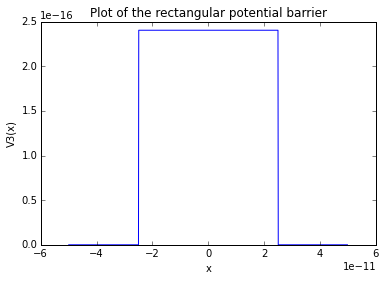

In [106]:
#plotting this new finite square potential 
plt.plot(xpoints,V3points)
plt.xlabel("x")
plt.ylabel("V3(x)")
plt.title("Plot of the rectangular potential barrier")

As you can see the step of the potential well is eqaul to V0 which we have again set to 800e. 

We now need to create a new function for the differential eqautions using the new potential defined: 

In [107]:
#creating a function for the rhs of the equations (1) and (2)
def frb(r,x,E):
    ''' Definition of our numerical function
    Inputs:
    r: vector where 1st element represnts psi and the 2nd phi 
    x: value of x at which to evaulate the function
    E: energy value at which the function is evaluated
    Outputs:
    f(psi,phi): returns 2 arrays, one for each rhs of the equation '''
    psi= r[0]  
    phi=r[1]
    f1=phi    # dψ/dt = φ
    f2=((2*m)/(hbar**2))*(V3(x)-E)*psi #dφ/dt = 2m/ћ^2[V(x)-E]ψ(x)
    return  np.array([f1,f2], float) #returns the 2 rhs of the equations 

Again we need to adapt the RungeKutta2d used before that implements our new frb function with the new rectangular barrier potenital: 

In [108]:
def RungeKutta2drb(r,xpoints, E):
    '''Fourth-order Runge Kutta rewritten for two simultaneous equations
    Inputs: 
    r: vector where 1st component is psi and 2nd is phi
    xpoints: an array of x-values
    Also depends on step h (global variable)
    Outputs: solutions for psi(x) and phi(x)'''
    
    psipoints = [] # a new array for the  results
    phipoints=[]
    
    for x in xpoints:
        psipoints.append(r[0]) 
        phipoints.append(r[1])
        k1 = h*frb(r,x,E)     
        k2 = h*frb(r+0.5*k1, x+0.5*h, E)
        k3 = h*frb(r+0.5*k2, x+0.5*h, E)
        k4 = h*frb(r+k3, x+h,E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    # these next two lines calculate for the point at x = xend!
    psipoints.append(r[0]) 
    phipoints.append(r[1])
    return np.array([psipoints, phipoints]) # convert output to numpy array with 2 rows and N columns

Now we will also need to adapt our function that implements the Secant method, by renaming it and using the new RungeKutta2drb:

In [109]:
def Sec3(Ea,Eb):
    '''Calculates the value of E that gives us the required solution. 
    Inputs:
    Ea: 1st initial guess engery 
    Eb: 2nd initial guess engery 
    Outputs: 
    Ec/e: The best guess of the root, the energy in eV '''
    tolerance = e/1000 
    err=1  # initialise the error variable
    #solving for the guesses
    psia= RungeKutta2drb(r,xpoints, Ea)[0,N] # only interested in the final value calculated by the function
    psib= RungeKutta2drb(r,xpoints, Eb)[0,N]
    #using the secant method to converge on the right answer
    #Iterate the secant method:
    while err > tolerance: 
        Ec = Eb - psib*(Eb-Ea)/(psib-psia)
        
        err = abs(Eb-Ea) 
        Ea = Eb # reset x1 and x2
        Eb = Ec # for the next iteration
        #and recalculate the solutions 
        psia= RungeKutta2drb(r,xpoints, Ea)[0,N]
        psib= RungeKutta2drb(r,xpoints, Eb)[0,N]                    
    return Ec

Can now use this to find the best guess of our energies, we will try to find the roots for when n=1,2 and 3:

In [110]:
#using the function to calculate the different values of the energy 
Enrb1=Sec3(350*e,450*e)  #initial guesses for the energy when n=1 when there is a harmonic potential
Enrb2=Sec3(600*e,1000*e)
Enrb3=Sec3(1500*e,2000*e)


print "The best guess of the energy is", Enrb1/e, "eV  For when n=1"
print "The best guess of the energy is", Enrb2/e, "eV  For when n=2"
print "The best guess of the energy is", Enrb3/e, "eV  For when n=3"



The best guess of the energy is 409.954438198 eV  For when n=1
The best guess of the energy is 1441.53050018 eV  For when n=2
The best guess of the energy is 1752.35473581 eV  For when n=3


For the inital guesses as I was unsure of the solution, the initial guesses used for Enrb1 were those before of 20e, and 45e using those the solution was 409.954438198 eV, therefore I changed my inital guesses to 350*e and 450*e (as seen above). This gave me an indication of the initial guesses I should use for the n=2 and n=3 engery states. 

Now we can find the corresponding wavefunctions and normalise them, for this rectangular potential barrier. 

In [111]:
#the wavefunctions are found using the RungeKutta2drb
Psirb1=RungeKutta2drb(r,xpoints,Enrb1)[0]  #the wavefunction found numerically for when n=1
Psirb2=RungeKutta2drb(r,xpoints,Enrb2)[0]
Psirb3=RungeKutta2drb(r,xpoints,Enrb3)[0]

#normalising these wavefunctions using the normalsation constant function 
Psirb1N=Normcon(Psirb1)*Psirb1  #normalised wavefunction= normalisation constant*the wavefunction 
Psirb2N=Normcon(Psirb2)*Psirb2    
Psirb3N=Normcon(Psirb3)*Psirb3

Again we can plot these numerical solutions, and analyse them: 

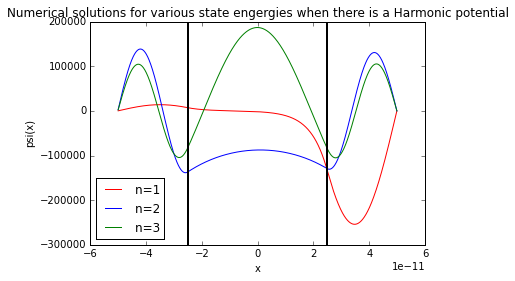

In [113]:
#plotting the normalised wavefunctions for different energy states
plt.plot(xpoints,Psirb1N[1:],'r-', label='n=1 ')
plt.plot(xpoints,Psirb2N[1:],'b-', label='n=2 ')
plt.plot(xpoints,Psirb3N[1:],'g-', label='n=3 ')

# construct the boundary
plt.axvline(x=a/2,c='k',ls='-',lw=2)
plt.axvline(x=-a/2,c='k',ls='-',lw=2)

#labelling the plot 
plt.legend(loc='lower left')
plt.title("Numerical solutions for various state engergies when there is a Harmonic potential")
plt.xlabel("x")
plt.ylabel("psi(x)")

Physics behind these soltions/explaining the wavefunctions:

For this rectangular barrier potenital, there are again 2 situations that are demonstrated in the above plot. The 1st for n=1 where E< V0 (could represent an alpha decay). If the particle is approaching the potential barrier from the right hand side, we see sinusodial wavefunction until it reaches the barrier, and then expoentitial decay. This represents that the probability of finding the particle on the other side of the barrier is very small, however there is still a small chance because of the quantum tunnelling. For the n=3 case where the E> V0 (e.g e+ scattering from positive ion ) there is always a sinusoidal wavefunction. The amptiude of the wavfunction is the greatest inside the potential barrier representing the increased probability of finding the particle there. For the n=2 case the E is almost equal to the V0 and I am uncertain of the findings. There seems to be sinusoidal wavefunction either side of the barrier as in the n=3 case, but then a somewhat decayed/decreased wavefunction as in the n=1 case, this could illustrate that there is equal prbablity of finiding the particle ouside either side of the barrier. For n=1 particle is most likey found before reaching the barrier (rhs) and for n=3 most likely to go through the barrier and be found inside the rectangular barrier. 

### Breif discussion

Overall this notebook seems to show a succefull code that can be adapted to solve the TISE for different potentials using a numerical method. We have been able to find the energy values for different values of n by making 2 inital guesses and using the Secant method and the RungeKutta2d function. This allowed us to find wavefunction solutions for different values of n. The wavefunctions showed general agreement with analytical solutions (when there was one), only seeming to differ on being a reflection along the xaxis (still unsure of the reason for this). The plots of the wavefunction solutions demonstrated certain important physics phenomeon such as quantum tunnelling and corespondance theorem. The assigment overall was generally intresting, especially when looking at different potentials where analytical solutions were much longer or not available. It would be intresting to futher extend the code for solutions to the time dependant Schrodinger equation, if that is possible. 